# SectionPy Module Testing Notebook
Jupyter Notebook created by **Ben Fisher** for testing and development of the StaticsPy library and for examples and explanation of the functions

## Imports

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from math import sqrt
module_path = os.path.abspath(os.path.join("C:\\Users\\benst\\Documents\\_0 Workspace\\py\\SectionPy\\SectionPy\\section.py"))
if module_path not in sys.path:
    sys.path.append(module_path)
import section as sc
sc.__version__

'0.0.1'

## Create Arbitrary Section
Create a numpy array of ordered pairs that describes an arbitrary, simple, closed, convext polygon of *n* verticies and sides. 

**Note:** for visualization purposes, we need to append the first coordinate to the end of the array in order to show a closed polygon in Matplotlib.

In [2]:
vertices = np.array([[-1,-2],[4,-1],[6,5],[3,3],[-3,5],[1,1]])
vertices = np.vstack((vertices, vertices[0]))
vertices

array([[-1, -2],
       [ 4, -1],
       [ 6,  5],
       [ 3,  3],
       [-3,  5],
       [ 1,  1],
       [-1, -2]])

We can check the shape of the array to make sure its n x 2:

In [3]:
vertices.shape

(7, 2)

Let's slice this array and visualize it using Matplotlib.

In [4]:
xs = vertices[:,0]
ys = vertices[:,1]

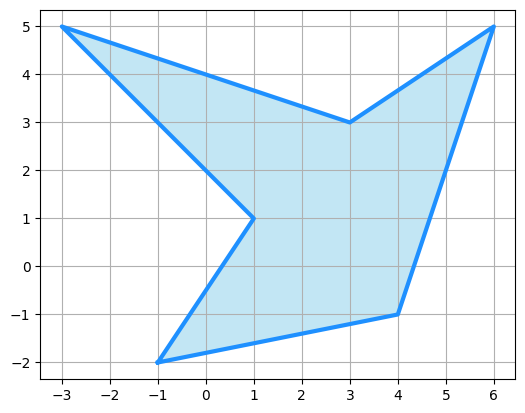

In [5]:
# First, let's create a plot
fig, ax = plt.subplots()

# Set the grid aspect ratio at 1:1 for square grids
ax.set_aspect('equal')

# Make the scale the same along both axes: 1
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

# Show the grid
plt.grid()

# Let's put some fill inside the polygon
ax.fill(xs, ys, color="skyblue",alpha=0.5)

# Finally, let's plot the polygon
plt.plot(xs,ys,color="dodgerblue",linewidth=3)

Assuming the vertices array is n x 2. Note that this double counts the first point, but that's ok, we'll operate to n-1

In [6]:
n = vertices.shape[0]

## Calculate the Perimeter
Determine the perimeter of the polygon based on the following formula:

$ P = \displaystyle\sum_{i=0}^{n-1}\sqrt{(x_{i+1}-x_i)^2+(y_{i+1}-y_i)^2} $ 

In [7]:
P = 0
for i in range(0,n-1):
    P += sqrt((xs[i+1]-xs[i])**2+(ys[i+1]-ys[i])**2)

# Print P (the answer should be 30.616087)
P

30.616086954686658

In [8]:
sc.perimeter(vertices)

30.616086954686658

## Calculate the Area
Determine area based on the **shoelace algorithm**, use the *Trapezoid Formula* or *Triangle Formula* as follows (*both formula give the same answer*):

$ A_{trapezoid}=\dfrac{1}{2}\displaystyle\sum_{i=0}^{n-1}(y_i+y_{i+1})(x_i-x_{i+1}) $

$ A_{triangle}=\dfrac{1}{2}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i) $

In [9]:
A = 0
for i in range(0,n-1):
    # A += (ys[i]+ys[i+1])*(xs[i]-xs[i+1])  # Trapezoid Formula
    A += (xs[i]*ys[i+1]-xs[i+1]*ys[i])    # Triangle Formula
A *= 0.5

# Print the area A (should be 26.5)
A

26.5

In [10]:
sc.area(vertices)

26.5

**TODO:** This only works if the polygon is *simple*, that means it doesn't self-intersect. Determine if need a function to perform Shamos-Hoey algorithm or Bentley-Ottmann algorithm, to determine if self-intersecting.

## Calculate the Centroids
Using an extension of the *Trapezoid Formula*, we can calculate the centroids Cx and Cy, using the area A calculated previously:

$ C_x = \displaystyle\frac{1}{6A}\sum_{i=0}^{n-1}(x_i+x_{i+1})(x_iy_{i+1}-x_{i+1}y_i) $

$ C_y = \displaystyle\frac{1}{6A}\sum_{i=0}^{n-1}(y_i+y_{i+1})(x_iy_{i+1}-x_{i+1}y_i) $

In [11]:
Cx = Cy = 0
for i in range(0,n-1):
    Cx += (xs[i]+xs[i+1])*(xs[i]*ys[i+1]-xs[i+1]*ys[i])
    Cy += (ys[i]+ys[i+1])*(xs[i]*ys[i+1]-xs[i+1]*ys[i])
Cx /= (6*A)
Cy /= (6*A)

In [12]:
# Print Cx and Cy (should be 2.075472, 1.54717, respectively)
Cx, Cy

(2.0754716981132075, 1.5471698113207548)

In [13]:
sc.centroids(vertices)

array([2.0754717 , 1.54716981])

In [14]:
sc.Cx(vertices), sc.Cy(vertices)

(2.0754716981132075, 1.5471698113207548)

## Calculate Extrema
Determine the maxima and minima of the polygon:

In [15]:
min_x = np.min(xs)
max_x = np.max(xs)
min_x, max_x

(-3, 6)

In [16]:
min_y = np.min(ys)
max_y = np.max(ys)
min_y, max_y

(-2, 5)

In [17]:
sc.extrema(vertices)

array([[-3,  6],
       [-2,  5]])

## Calculate the Second Moment of Area about Own Axis
Continuing to use the *shoelace algorithm* calculate the second moments of area (moments of inertia) of the polygon as follows:

$ I_y=\dfrac{1}{12}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i)(x_i^2+x_ix_{i+1}+x_{i+1}^2) $

$ I_x=\dfrac{1}{12}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i)(y_i^2+y_iy_{i+1}+y_{i+1}^2) $

Below is the formula for the polar moment of inertia

$ I_{xy}=\dfrac{1}{24}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i)(x_iy_{i+1}+2x_iy_i+2x_{i+1}y_{i+1}+x_{i+1}y_i) $

In [18]:
Ix = Iy = Ixy = 0
for i in range(0,n-1):
    Ix += (xs[i]*ys[i+1]-xs[i+1]*ys[i])*(ys[i]**2+ys[i]*ys[i+1]+ys[i+1]**2)
    Iy += (xs[i]*ys[i+1]-xs[i+1]*ys[i])*(xs[i]**2+xs[i]*xs[i+1]+xs[i+1]**2)
    Ixy += (xs[i]*ys[i+1]-xs[i+1]*ys[i])*(xs[i]*ys[i+1]+2*xs[i]*ys[i]+2*xs[i+1]*ys[i+1]+xs[i+1]*ys[i])
    
Ix /= 12
Iy /= 12
Ixy /= 24

In [19]:
Ix, Iy, Ixy, Ix+Iy

(140.08333333333334, 203.41666666666666, 83.79166666666667, 343.5)

**TODO:** There appears to be some sort of error calculating the *polar moment* as it should be Ix + Iy. For now, just use Ix + Iy, then use point formula in later update.

In [20]:
sc.inertias(vertices)

array([140.08333333, 203.41666667, 343.5       ])

In [21]:
Ix = sc.Ix(vertices)
Iy = sc.Iy(vertices)
Ixy = sc.Ixy(vertices)
Ix, Iy, Ixy

(140.08333333333334, 203.41666666666666, 343.5)

## Calculate the radii of gyration

$ r = \displaystyle\sqrt{\frac{I}{A}} $

In [22]:
rx = sqrt(Ix/A)
ry = sqrt(Iy/A)
rx, ry

(2.2991658317773815, 2.7705776706186778)

In [24]:
radii = sc.radii(vertices)
radii

array([2.29916583, 2.77057767])

In [30]:
sc.rx(vertices), sc.ry(vertices)

(2.2991658317773815, 2.7705776706186778)

Let's replot the shape, but put plot the centroid on the shape.

Text(0, 10, 'Centroid')

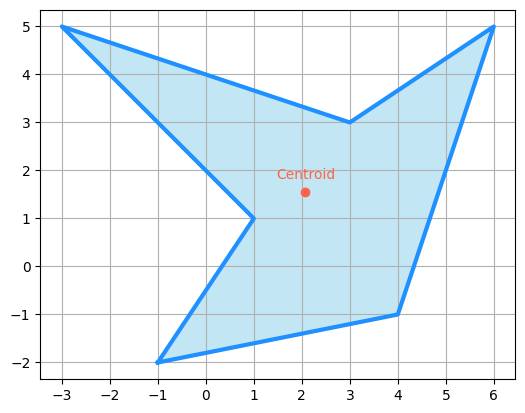

In [81]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid()
ax.fill(xs, ys, color="skyblue",alpha=0.5)
plt.plot(xs,ys,color="dodgerblue",linewidth=3)

plt.scatter(sc.Cx(vertices), sc.Cy(vertices),color="tomato",marker="o",zorder=2)

plt.annotate("Centroid",                             # the actual label
                 (sc.Cx(vertices), sc.Cy(vertices)), # these are the coordinates to position the label
                 textcoords="offset points",         # how to position the text
                 xytext=(0,10),                      # distance from text to points (x,y)
                 ha='center',                        # horizontal alignment can be left, right or center
                 color="tomato")                        

# Line Intersection Functions
**TODO List**
1. Linear interpolation
2. Bezier parameters, *t* and *u*, to test intersection
3. Multilinear interpolation - provide table of numbers and interpolate between the appropriate ordinates
4. Bilinear interpolation